# Actividad 1 - Titanic: Machine Learning from Disaster

---

### Daniela Jiménez Téllez - A01654798

### Lautaro Gabriel Coteja - A01571214

### Andrés Villarreal González - A00833915

### Héctor Hibran Tapia Fernández - A01661114

---

### Importamos librerías

In [114]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use("dark_background")

### Importamos dataset (train)

In [115]:
df = pd.read_csv("train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Recordamos que se descompone de la siguiente forma el dataset:

- train: Contiene las 12 columnas del dataset, solo tenemos del pasajero 1 al 891.
- test: Contiene 11 columnas del dataset, se quitó "Survived", tenemos del pasajero 892 al 1309.
- gender_submission: Contiene la columna "Survived" del test, con los mismos pasarejos, se usará como comparación de respuesta al finalizar el modelo.

### Documentación

| Variable  | Definición                              | Clave                                                  |
|-----------|-----------------------------------------|--------------------------------------------------------|
| survival  | Supervivencia                           | 0 = No, 1 = Sí                                         |
| pclass    | Clase de ticket                         | 1 = 1ª, 2 = 2ª, 3 = 3ª                                 |
| sex       | Sexo                                    |                                                        |
| Age       | Edad en años                            |                                                        |
| sibsp     | Nº de hermanos / cónyuges a bordo       |                                                        |
| parch     | Nº de padres / hijos a bordo            |                                                        |
| ticket    | Número de ticket                        |                                                        |
| fare      | Tarifa del pasajero                     |                                                        |
| cabin     | Número de camarote                      |                                                        |
| embarked  | Puerto de embarque                      | C = Cherburgo, Q = Queenstown, S = Southampton         |

**Notas sobre las variables:**
- **pclass:** Un indicador de estatus socioeconómico (SES)
  - 1ª = Alta
  - 2ª = Media
  - 3ª = Baja
- **edad:** La edad es fraccionaria si es menor de 1. Si la edad es estimada, se presenta en la forma xx.5
- **sibsp:** El conjunto de datos define las relaciones familiares de la siguiente manera:
  - Hermano/a = hermano, hermana, hermanastro/a
  - Cónyuge = esposo, esposa (se ignoran amantes y prometidos)
- **parch:** El conjunto de datos define las relaciones familiares de la siguiente manera:
  - Padre/madre = madre, padre
  - Hijo/a = hija, hijo, hijastra/o
  - Algunos niños viajaban solo con una niñera, por lo que parch=0 para ellos.

In [116]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Procesamientos de Datos

---


In [117]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

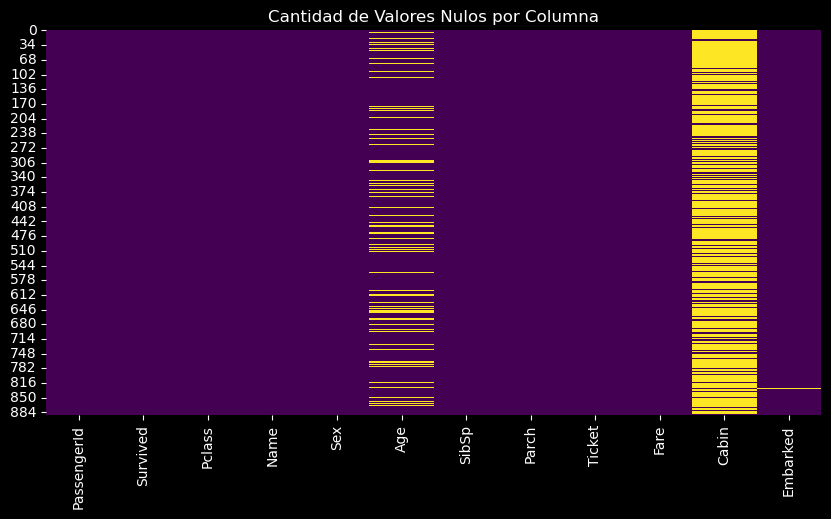

In [118]:
plt.figure(figsize = (10, 5))
plt.title('Cantidad de Valores Nulos por Columna')
sns.heatmap(df.isnull(), cbar = False, cmap = 'viridis')  
plt.show()

En el caso de la variable "Cabin" no tenemos seguro cómo parchar los datos nulos. Se hará un análisis más a fondo para decidir si en un futuro nos servirá o se puede eliminar.

### Vamos a hacer experimentos...



Leyendo el diccionario sabemos que la variable "Cabin" se refiere al número de cabina o cuarto que tenía cada pasajero, y en el análisis anterior observamos que de 891 perfiles recopilados, 687 no cuentan con número de cabina. Haremos un análisis más a fondo para poder averiguar a qué se debe esto.

In [119]:
# pd.set_option("display.max_rows", None)

pd.reset_option('display.max_rows')

df_cabin_notnull = df[df["Cabin"].notnull()]
df_cabin_notnull

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [120]:
df_cabin_notnull["Cabin"]

1              C85
3             C123
6              E46
10              G6
11            C103
          ...     
871            D35
872    B51 B53 B55
879            C50
887            B42
889           C148
Name: Cabin, Length: 204, dtype: object

Gracias a la información anterior, e investigando acerca de la distribución del Titanic, llegamos a la conclusión que el barco estaba dividido en [...] secciones, de las cuales [...] eran de primera clase, [...] de segunda, y [...] de tercera. Debido a que esta información nos la proporciona la variable "Pclass", y a que "Cabin" tiene muchos valores nulos, decidimos eliminar la columna.

In [121]:
df = df.drop("Cabin", axis = 1)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


### Utilizando el nuevo DataFrame...

Dado que la variable "Embark" solo cuenta con dos valores nulo, y se refiere al lugar de entrada por donde ingresó cada pasajero, se llenará con la moda.

In [122]:
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])

Por otro lado, para parchar la columna de la edad lo primero que se hará es dividir los datos por "título", ya que cada persona tiene un título que indica dentro de qué categoría cae. Posteriormente, se interpolará dentro de cada sub DataFrame, específicamente en la columna "Age", para así poder tener el DF con 0 valores nulos.

In [123]:
# Separando las personas por título

df["Title"] = df["Name"].apply(lambda x: x.split(",")[1].split(".")[0].strip())

In [124]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,Mr


In [125]:
df.value_counts("Title")

Title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Major             2
Col               2
Mlle              2
Sir               1
Ms                1
Capt              1
Mme               1
Lady              1
Jonkheer          1
Don               1
the Countess      1
Name: count, dtype: int64

In [126]:
# DataFrame Mr

df_mr = df[df["Title"] == "Mr"]

In [127]:
df_mr[df_mr.isnull().any(axis = 1)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q,Mr
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,S,Mr
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,C,Mr
29,30,0,3,"Todoroff, Mr. Lalio",male,NaN,0,0,349216,7.8958,S,Mr
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,C,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...
839,840,1,1,"Marechal, Mr. Pierre",male,NaN,0,0,11774,29.7000,C,Mr
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.5500,S,Mr
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,C,Mr
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,S,Mr


In [128]:
# Interpolación

df_mr.loc[:, "Age"] = df_mr["Age"].interpolate(method = "linear")

In [129]:
# pd.set_option("display.max_rows", None)

pd.reset_option("display.max_rows")

df_mr

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr
5,6,0,3,"Moran, Mr. James",male,44.5,0,0,330877,8.4583,Q,Mr
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S,Mr
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,S,Mr
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,S,Mr
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,S,Mr
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,Mr


In [130]:
# DataFrame Miss

df_miss = df[df["Title"] == "Miss"]

In [131]:
df_miss

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,S,Miss
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,S,Miss
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,S,Miss
22,23,1,3,"McGowan, Miss. Anna ""Annie""",female,15.0,0,0,330923,8.0292,Q,Miss
...,...,...,...,...,...,...,...,...,...,...,...,...
866,867,1,2,"Duran y More, Miss. Asuncion",female,27.0,1,0,SC/PARIS 2149,13.8583,C,Miss
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,C,Miss
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,S,Miss
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,Miss


In [132]:
# Interpolación

df_miss.loc[:, "Age"] = df_miss["Age"].interpolate(method = "linear")

In [133]:
df_miss

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,S,Miss
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,S,Miss
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,S,Miss
22,23,1,3,"McGowan, Miss. Anna ""Annie""",female,15.0,0,0,330923,8.0292,Q,Miss
...,...,...,...,...,...,...,...,...,...,...,...,...
866,867,1,2,"Duran y More, Miss. Asuncion",female,27.0,1,0,SC/PARIS 2149,13.8583,C,Miss
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,C,Miss
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,S,Miss
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,Miss


In [134]:
# DataFrame Mrs

df_mrs = df[df["Title"] == "Mrs"]

In [135]:
df_mrs

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S,Mrs
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C,Mrs
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,S,Mrs
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,S,Mrs
874,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.0000,C,Mrs
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C,Mrs
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,S,Mrs


In [136]:
# Interpolación

df_mrs.loc[:, "Age"] = df_mrs["Age"].interpolate(method = "linear")

In [137]:
df_mrs

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S,Mrs
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C,Mrs
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,S,Mrs
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,S,Mrs
874,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.0000,C,Mrs
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C,Mrs
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,S,Mrs


In [138]:
# DataFrame Master

df_master = df[df["Title"] == "Master"]

In [139]:
df_master

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,S,Master
16,17,0,3,"Rice, Master. Eugene",male,2.00,4,1,382652,29.1250,Q,Master
50,51,0,3,"Panula, Master. Juha Niilo",male,7.00,4,1,3101295,39.6875,S,Master
59,60,0,3,"Goodwin, Master. William Frederick",male,11.00,5,2,CA 2144,46.9000,S,Master
63,64,0,3,"Skoog, Master. Harald",male,4.00,3,2,347088,27.9000,S,Master
65,66,1,3,"Moubarek, Master. Gerios",male,NaN,1,1,2661,15.2458,C,Master
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,S,Master
125,126,1,3,"Nicola-Yarred, Master. Elias",male,12.00,1,0,2651,11.2417,C,Master
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.5500,S,Master
164,165,0,3,"Panula, Master. Eino Viljami",male,1.00,4,1,3101295,39.6875,S,Master


In [140]:
# Interpolación

df_master.loc[:, "Age"] = df_master["Age"].interpolate(method = "linear")

In [141]:
df_master

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000,3,1,349909,21.0750,S,Master
16,17,0,3,"Rice, Master. Eugene",male,2.000,4,1,382652,29.1250,Q,Master
50,51,0,3,"Panula, Master. Juha Niilo",male,7.000,4,1,3101295,39.6875,S,Master
59,60,0,3,"Goodwin, Master. William Frederick",male,11.000,5,2,CA 2144,46.9000,S,Master
63,64,0,3,"Skoog, Master. Harald",male,4.000,3,2,347088,27.9000,S,Master
65,66,1,3,"Moubarek, Master. Gerios",male,2.415,1,1,2661,15.2458,C,Master
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.830,0,2,248738,29.0000,S,Master
125,126,1,3,"Nicola-Yarred, Master. Elias",male,12.000,1,0,2651,11.2417,C,Master
159,160,0,3,"Sage, Master. Thomas Henry",male,6.500,8,2,CA. 2343,69.5500,S,Master
164,165,0,3,"Panula, Master. Eino Viljami",male,1.000,4,1,3101295,39.6875,S,Master


In [142]:
# DataFrame de todo lo demás

df_extra = df[~df["Title"].isin(["Mr", "Miss", "Mrs", "Master"])]

In [143]:
df_extra

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
30,31,0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.7208,C,Don
149,150,0,2,"Byles, Rev. Thomas Roussel Davids",male,42.0,0,0,244310,13.0000,S,Rev
150,151,0,2,"Bateman, Rev. Robert James",male,51.0,0,0,S.O.P. 1166,12.5250,S,Rev
245,246,0,1,"Minahan, Dr. William Edward",male,44.0,2,0,19928,90.0000,Q,Dr
249,250,0,2,"Carter, Rev. Ernest Courtenay",male,54.0,1,0,244252,26.0000,S,Rev
317,318,0,2,"Moraweck, Dr. Ernest",male,54.0,0,0,29011,14.0000,S,Dr
369,370,1,1,"Aubart, Mme. Leontine Pauline",female,24.0,0,0,PC 17477,69.3000,C,Mme
398,399,0,2,"Pain, Dr. Alfred",male,23.0,0,0,244278,10.5000,S,Dr
443,444,1,2,"Reynaldo, Ms. Encarnacion",female,28.0,0,0,230434,13.0000,S,Ms
449,450,1,1,"Peuchen, Major. Arthur Godfrey",male,52.0,0,0,113786,30.5000,S,Major


In [144]:
# Parchar el único NaN con la media de las personas con el título Dr

mean_age_dr = df_extra[df_extra["Title"] == "Dr"]["Age"].mean()

df_extra.loc[(df["Title"] == "Dr") & (df["Age"].isnull()), "Age"] = mean_age_dr

In [145]:
df_extra

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
30,31,0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.7208,C,Don
149,150,0,2,"Byles, Rev. Thomas Roussel Davids",male,42.0,0,0,244310,13.0000,S,Rev
150,151,0,2,"Bateman, Rev. Robert James",male,51.0,0,0,S.O.P. 1166,12.5250,S,Rev
245,246,0,1,"Minahan, Dr. William Edward",male,44.0,2,0,19928,90.0000,Q,Dr
249,250,0,2,"Carter, Rev. Ernest Courtenay",male,54.0,1,0,244252,26.0000,S,Rev
317,318,0,2,"Moraweck, Dr. Ernest",male,54.0,0,0,29011,14.0000,S,Dr
369,370,1,1,"Aubart, Mme. Leontine Pauline",female,24.0,0,0,PC 17477,69.3000,C,Mme
398,399,0,2,"Pain, Dr. Alfred",male,23.0,0,0,244278,10.5000,S,Dr
443,444,1,2,"Reynaldo, Ms. Encarnacion",female,28.0,0,0,230434,13.0000,S,Ms
449,450,1,1,"Peuchen, Major. Arthur Godfrey",male,52.0,0,0,113786,30.5000,S,Major


In [146]:
# Juntar todos los DF

df_list = [df_mr, df_miss, df_mrs, df_master, df_extra]
df = pd.concat(df_list, ignore_index = True)

In [147]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr
2,6,0,3,"Moran, Mr. James",male,44.5,0,0,330877,8.4583,Q,Mr
3,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S,Mr
4,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...
886,767,0,1,"Brewe, Dr. Arthur Jackson",male,42.0,0,0,112379,39.6000,C,Dr
887,797,1,1,"Leader, Dr. Alice (Farnham)",female,49.0,0,0,17465,25.9292,S,Dr
888,823,0,1,"Reuchlin, Jonkheer. John George",male,38.0,0,0,19972,0.0000,S,Jonkheer
889,849,0,2,"Harper, Rev. John",male,28.0,0,1,248727,33.0000,S,Rev


In [148]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Title          0
dtype: int64

Ya que tenemos 0 valores nulos, podemos iniciar con el análisis.

## Análisis de Datos

---


In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
 11  Title        891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [150]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.807054,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.883697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,21.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.125000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


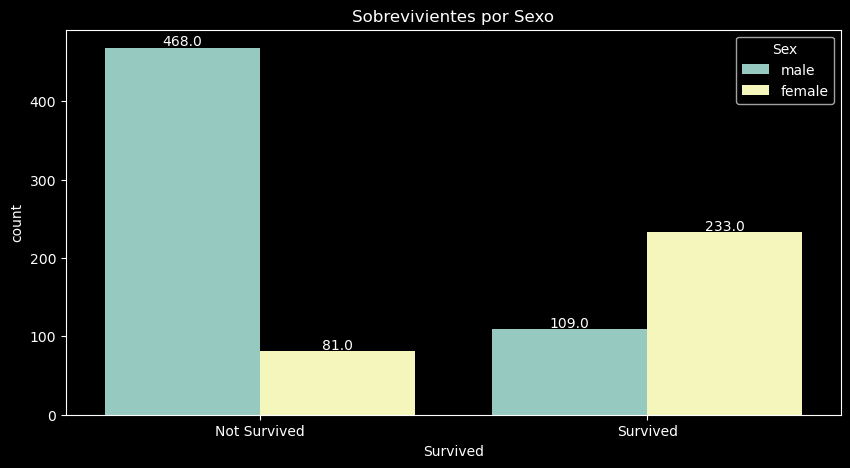

In [151]:
plt.figure(figsize = (10, 5))
plt.title('Sobrevivientes por Sexo')
sns.countplot(x = 'Survived', hue = 'Sex', data = df)
plt.xticks([0, 1], ['Not Survived', 'Survived'])

for p in plt.gca().patches:
    plt.gca().annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2, p.get_height() + 8), ha = 'center', va = 'center')

plt.show()

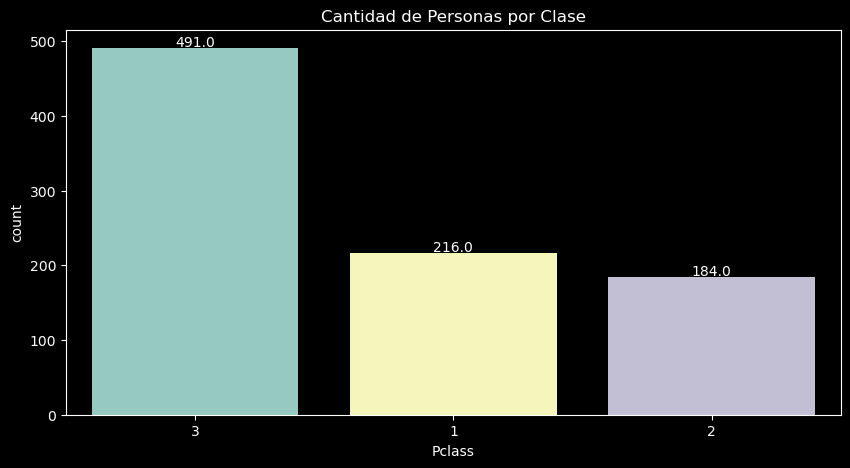

In [152]:
plt.figure(figsize = (10, 5))
plt.title('Cantidad de Personas por Clase')
sns.countplot(x = 'Pclass', data = df
                , order = df['Pclass'].value_counts().index
                 )

for p in plt.gca().patches:
    plt.gca().annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2, p.get_height() + 8), ha = 'center', va = 'center')
    
plt.show()

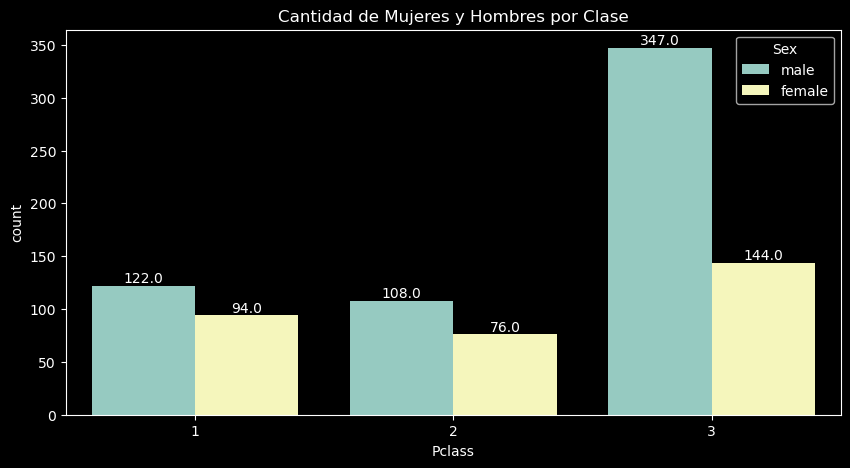

In [153]:
plt.figure(figsize = (10, 5))
plt.title('Cantidad de Mujeres y Hombres por Clase')
sns.countplot(x = 'Pclass', hue = 'Sex', data = df)

for p in plt.gca().patches:
    plt.gca().annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2, p.get_height() + 7), ha = 'center', va = 'center')

plt.show()


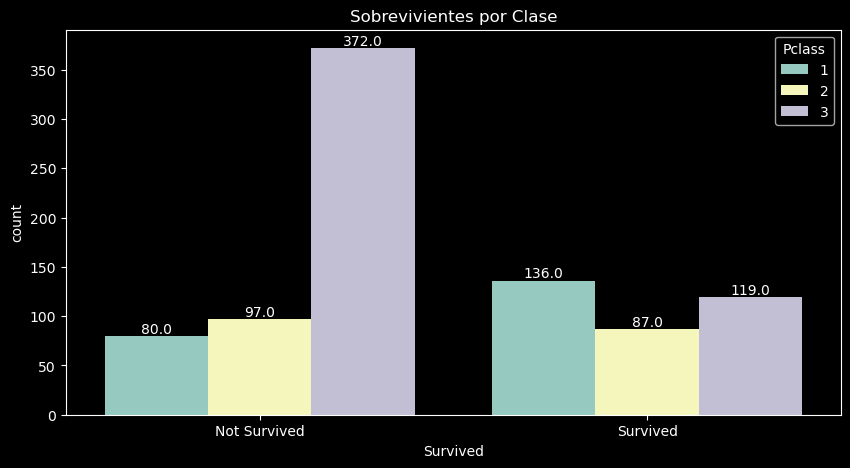

In [154]:
plt.figure(figsize = (10, 5))
plt.title('Sobrevivientes por Clase')
sns.countplot(x = 'Survived', hue = 'Pclass', data = df)

for p in plt.gca().patches:
    plt.gca().annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2, p.get_height() + 7), ha = 'center', va = 'center')
    
plt.xticks([0, 1], ['Not Survived', 'Survived'])
plt.show()

HACER GRÁFICAS DE FAMILIA

### Haciendo una matriz de correlación...

Ya habiendo hecho el análisis, se hará una matriz de correlación para ver cómo se comportan las variables con respecto a otras, y así poder tomar decisiones en cuanto a redimensionar el dataset, etc.

Primero se convertirán las variables categóricas con strings a números, al agregar una nueva columna que  nos permitirá identificar qué es qué.


In [155]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
encoder_gender = label_encoder.fit_transform(df['Sex'])
df["Sex_M1_F0"] = encoder_gender

In [156]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Sex_M1_F0
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr,1
1,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr,1
2,6,0,3,"Moran, Mr. James",male,44.5,0,0,330877,8.4583,Q,Mr,1
3,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S,Mr,1
4,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,S,Mr,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,767,0,1,"Brewe, Dr. Arthur Jackson",male,42.0,0,0,112379,39.6000,C,Dr,1
887,797,1,1,"Leader, Dr. Alice (Farnham)",female,49.0,0,0,17465,25.9292,S,Dr,0
888,823,0,1,"Reuchlin, Jonkheer. John George",male,38.0,0,0,19972,0.0000,S,Jonkheer,1
889,849,0,2,"Harper, Rev. John",male,28.0,0,1,248727,33.0000,S,Rev,1


In [157]:
# Quitamos Sex ya que ya creamos una nueva columna con valores binarios (Male - 1 y Female - 0)

df = df.drop("Sex", axis = 1)

In [158]:
df

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Sex_M1_F0
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,S,Mr,1
1,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,S,Mr,1
2,6,0,3,"Moran, Mr. James",44.5,0,0,330877,8.4583,Q,Mr,1
3,7,0,1,"McCarthy, Mr. Timothy J",54.0,0,0,17463,51.8625,S,Mr,1
4,13,0,3,"Saundercock, Mr. William Henry",20.0,0,0,A/5. 2151,8.0500,S,Mr,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,767,0,1,"Brewe, Dr. Arthur Jackson",42.0,0,0,112379,39.6000,C,Dr,1
887,797,1,1,"Leader, Dr. Alice (Farnham)",49.0,0,0,17465,25.9292,S,Dr,0
888,823,0,1,"Reuchlin, Jonkheer. John George",38.0,0,0,19972,0.0000,S,Jonkheer,1
889,849,0,2,"Harper, Rev. John",28.0,0,1,248727,33.0000,S,Rev,1


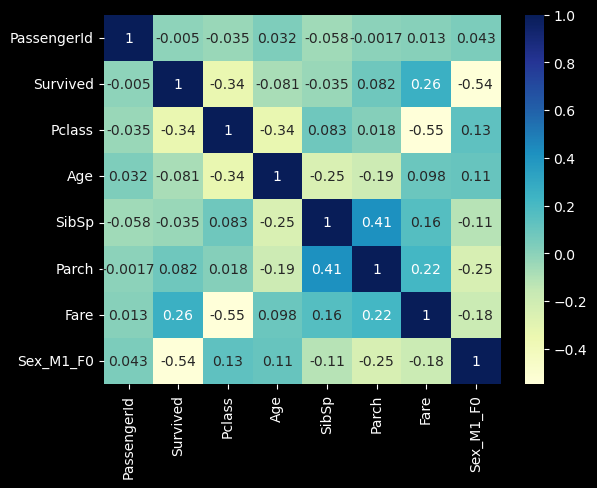

In [159]:
df_numeric = df.select_dtypes(include = ["number"]) # Solo se utilizan variables numéricas
corr = df_numeric.corr()
sns.heatmap(corr, annot = True, cmap = "YlGnBu")
plt.show()

-> DESCRIBIR MATRIZ DE CORRELACIÓN

Como observamos anteriormente, dentro del dataset existen 2 columnas llamadas "Sibsp" y "Parch" las cuales hacen referencia a:

* Sibsp: número de hermanxs o esposxs que tiene cada persona
* Parch: número de padres o hijxs que tiene cada persona

Dado que en la matriz de correlación se puede ver que estas variables están muy correlacionadas, se sumarán para hacer una sola columna llamada "Family", la cual nos dirá cuál es el número total de familiares que tiene cada persona en el barco.

In [160]:
df["Family"] = df["SibSp"] + df["Parch"]

In [161]:
df

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Sex_M1_F0,Family
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,S,Mr,1,1
1,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,S,Mr,1,0
2,6,0,3,"Moran, Mr. James",44.5,0,0,330877,8.4583,Q,Mr,1,0
3,7,0,1,"McCarthy, Mr. Timothy J",54.0,0,0,17463,51.8625,S,Mr,1,0
4,13,0,3,"Saundercock, Mr. William Henry",20.0,0,0,A/5. 2151,8.0500,S,Mr,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,767,0,1,"Brewe, Dr. Arthur Jackson",42.0,0,0,112379,39.6000,C,Dr,1,0
887,797,1,1,"Leader, Dr. Alice (Farnham)",49.0,0,0,17465,25.9292,S,Dr,0,0
888,823,0,1,"Reuchlin, Jonkheer. John George",38.0,0,0,19972,0.0000,S,Jonkheer,1,0
889,849,0,2,"Harper, Rev. John",28.0,0,1,248727,33.0000,S,Rev,1,1


In [162]:
# Quitamos SibSp y Parch para no tener tantas columnas

df = df.drop(["SibSp", "Parch"], axis = 1)

In [163]:
df

,PassengerId,Survived,Pclass,Name,Age,Ticket,Fare,Embarked,Title,Sex_M1_F0,Family
0,1,0,3,"Braund, Mr. Owen Harris",22.0,A/5 21171,7.2500,S,Mr,1,1
1,5,0,3,"Allen, Mr. William Henry",35.0,373450,8.0500,S,Mr,1,0
2,6,0,3,"Moran, Mr. James",44.5,330877,8.4583,Q,Mr,1,0
3,7,0,1,"McCarthy, Mr. Timothy J",54.0,17463,51.8625,S,Mr,1,0
4,13,0,3,"Saundercock, Mr. William Henry",20.0,A/5. 2151,8.0500,S,Mr,1,0
...,...,...,...,...,...,...,...,...,...,...,...
886,767,0,1,"Brewe, Dr. Arthur Jackson",42.0,112379,39.6000,C,Dr,1,0
887,797,1,1,"Leader, Dr. Alice (Farnham)",49.0,17465,25.9292,S,Dr,0,0
888,823,0,1,"Reuchlin, Jonkheer. John George",38.0,19972,0.0000,S,Jonkheer,1,0
889,849,0,2,"Harper, Rev. John",28.0,248727,33.0000,S,Rev,1,1


In [164]:
# GRÁFICA DE CANTIDAD DE FAMILIA POR PERSONA

Igualmente, se quitarán las variables "PassengerId" y "Name" ya que no nos muestran información importante ahora que tenemos la nueva variable de "Title", además de que cualquier otra información se puede encontrar en columnas como "Sex" o "Age".

In [172]:
df = df.drop(["PassengerId", "Name"], axis = 1)

In [173]:
df

,Survived,Pclass,Age,Ticket,Fare,Embarked,Title,Sex_M1_F0,Family
0,0,3,22.0,A/5 21171,7.2500,S,Mr,1,1
1,0,3,35.0,373450,8.0500,S,Mr,1,0
2,0,3,44.5,330877,8.4583,Q,Mr,1,0
3,0,1,54.0,17463,51.8625,S,Mr,1,0
4,0,3,20.0,A/5. 2151,8.0500,S,Mr,1,0
...,...,...,...,...,...,...,...,...,...
886,0,1,42.0,112379,39.6000,C,Dr,1,0
887,1,1,49.0,17465,25.9292,S,Dr,0,0
888,0,1,38.0,19972,0.0000,S,Jonkheer,1,0
889,0,2,28.0,248727,33.0000,S,Rev,1,1


## Modelos Predictivos

---


### Importando los datos de prueba

In [165]:
df_test = pd.read_csv("test.csv")

In [166]:
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


### Regresión Lineal

In [167]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [168]:
X_train = df.drop("Survived", axis = 1)
y_train = df["Survived"]

In [169]:
model = LogisticRegression(max_iter = 1000)
model.fit(X_train, y_train)

ValueError: could not convert string to float: 'Braund, Mr. Owen Harris'